In [11]:
import gdal
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from tqdm import tqdm
import cv2
from copy import deepcopy

shape: (720, 1280, 3)


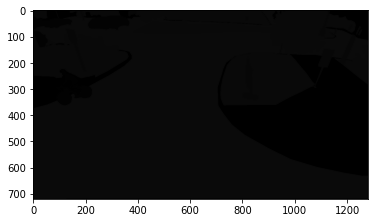

In [9]:
#  初始化每个类的数目
Background_num = 0
Person_num = 0
Bike_num = 0
Car_num = 0
Drone_num = 0
Boat_num = 0
Animal_num = 0
Obstacle_num = 0
Construction_num = 0
Vegetation_num = 0
Road_num = 0
Sky_num = 0

# data_root = '/home/user/rz/data/seg/suichang'
data_root = '/home/user/rz/data/seg/aeroscapes'
direct = 'SegmentationClass/'
label_paths = glob(os.path.join(data_root, direct, '*.png'))

imgp = label_paths[0]
img = cv2.imread(imgp)
print('shape:', img.shape)
plt.imshow(img)
plt.show()

100%|██████████| 3269/3269 [00:08<00:00, 385.35it/s]
[102230623, 1835465, 17654, 2235463, 6407, 28888, 99462, 3873526, 40938392, 211448687, 64574460, 52237929]


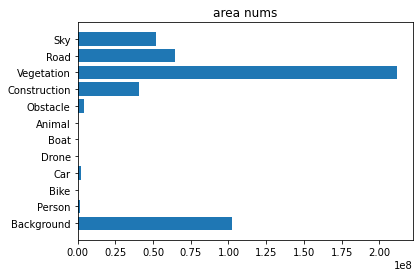

In [15]:
for label_path in tqdm(label_paths):
    label = gdal.Open(label_path).ReadAsArray(0, 0, 256, 256)
    Background_num += np.sum(label == 0)
    Person_num += np.sum(label == 1)
    Bike_num += np.sum(label == 2)
    Car_num += np.sum(label == 3)
    Drone_num += np.sum(label == 4)
    Boat_num += np.sum(label == 5)
    Animal_num += np.sum(label == 6)
    Obstacle_num += np.sum(label == 7)
    Construction_num += np.sum(label == 8)
    Vegetation_num += np.sum(label == 9)
    Road_num += np.sum(label == 10)
    Sky_num += np.sum(label == 11)

# 这两行代码解决 plt 中文显示的问题
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

classes = ('Background', 'Person', 'Bike', 'Car', 'Drone', 'Boat', 'Animal', 'Obstacle', 'Construction', 'Vegetation', 'Road', 'Sky')
numbers = [Background_num, Person_num, Bike_num, Car_num, Drone_num, Boat_num, Animal_num, Obstacle_num, Construction_num, Vegetation_num, Road_num, Sky_num]

print(numbers)
plt.barh(classes, numbers)
plt.title('area nums')
plt.savefig("result.png", dpi = 300, bbox_inches="tight")
plt.show()

In [17]:
#重划类别，缩减为"区域、天空、物体"这三类
# new_img_cls = deepcopy(img)
for imgp in tqdm(label_paths):
    name = os.path.basename(imgp)
    new_img_cls = cv2.imread(imgp)

    # background、vegetation、road to class idx 0（area)
    new_img_cls[new_img_cls==9] = 0
    new_img_cls[new_img_cls==10] = 0

    #
    new_img_cls[new_img_cls==1] = 30
    new_img_cls[new_img_cls==2] = 30
    new_img_cls[new_img_cls==3] = 30
    new_img_cls[new_img_cls==4] = 30
    new_img_cls[new_img_cls==5] = 30
    new_img_cls[new_img_cls==6] = 30
    new_img_cls[new_img_cls==7] = 30
    new_img_cls[new_img_cls==8] = 30

    #sky
    new_img_cls[new_img_cls==11] = 20

    new_img_cls[new_img_cls==30] = 2
    new_img_cls[new_img_cls==20] = 1

    store_path = os.path.join('./data/new_aeroscapes_label/', name)
    cv2.imwrite(store_path, new_img_cls)

100%|██████████| 3269/3269 [01:19<00:00, 41.35it/s]


100%|██████████| 3269/3269 [00:16<00:00, 198.45it/s]
[507095331, 69971670, 65644551]


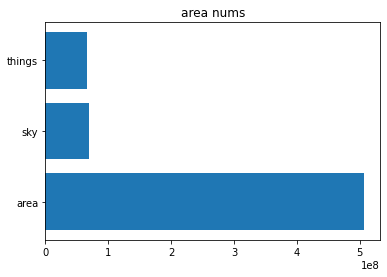

In [18]:
new_label_path = glob('./data/new_aeroscapes_label/*.png')
area_num, sky_num, things_num = 0, 0, 0

for label_path in tqdm(new_label_path):
    label = gdal.Open(label_path).ReadAsArray(0, 0, 256, 256)
    area_num += np.sum(label == 0)
    sky_num += np.sum(label == 1)
    things_num += np.sum(label == 2)


# 这两行代码解决 plt 中文显示的问题
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

classes = ('area', 'sky', 'things')
numbers = [area_num, sky_num, things_num]

print(numbers)
plt.barh(classes, numbers)
plt.title('area nums')
plt.savefig("result.png", dpi = 300, bbox_inches="tight")
plt.show()